In [58]:
# MADE BY BATUHAN CAKIR
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [59]:
# Importing dataset
mnist_dataset = keras.datasets.mnist

In [60]:
# Dividing dataset train and test
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [61]:
# Train and Test Sets shapes
print("Train set shape = ", x_train.shape)
print("Test set shape = ", x_test.shape)

Train set shape =  (60000, 28, 28)
Test set shape =  (10000, 28, 28)


In [63]:
# Computing the histogram counts for each train class
hist_counts, hist_bins = np.histogram(y_train, bins=np.arange(len(np.unique(y_train)) + 1))

# Calculating train class probabilities
total_count = np.sum(hist_counts)  # Rename the variable to avoid conflict
probabilities = hist_counts / total_count
rounded_probabilities = [round(p, 4) for p in probabilities]

# Creating bar plot for each train class
colors = px.colors.qualitative.Plotly[:len(hist_counts)]
fig = go.Figure(data=[go.Bar(x=hist_bins[:-1], y=hist_counts, marker_color=colors, text=rounded_probabilities, textposition="outside")])
fig.update_layout(title="Class Distribution for Train Set", xaxis_title="Class", yaxis_title="Count",
                  xaxis=dict(tickmode="linear", tick0=0, dtick=1))
fig.show()

In [64]:
# Creating a pie chart for each train class
fig = go.Figure(data = [go.Pie(labels=hist_bins[:-1], values = rounded_probabilities, textposition = "inside", textinfo = "label+percent", marker = dict(colors = colors))])
fig.update_layout(title = "Class Distribution for Train Set")
fig.show()

In [66]:
# Computing the histogram counts for each test class
hist_counts, hist_bins = np.histogram(y_test, bins=np.arange(len(np.unique(y_test)) + 1))

# Calculating test class probabilities
total_count = np.sum(hist_counts)
probabilities = hist_counts / total_count
rounded_probabilities = [round(p, 4) for p in probabilities]

# Creating bar plot for each test class
colors = px.colors.qualitative.Plotly[:len(hist_counts)]
fig = go.Figure(data=[go.Bar(x=hist_bins[:-1], y=hist_counts, marker_color=colors, text=rounded_probabilities, textposition="outside")])
fig.update_layout(title="Class Distribution for Test Set", xaxis_title="Class", yaxis_title="Count",
                  xaxis=dict(tickmode="linear", tick0=0, dtick=1))
fig.show()


In [67]:
# Creating a pie chart for each test class
fig = go.Figure(data = [go.Pie(labels = hist_bins[:-1], values = rounded_probabilities, textposition = "inside", textinfo = "label+percent", marker = dict(colors = colors))])
fig.update_layout(title = "Class Distribution for Test Set")
fig.show()

In [68]:
# Normalizing training and testing data between 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

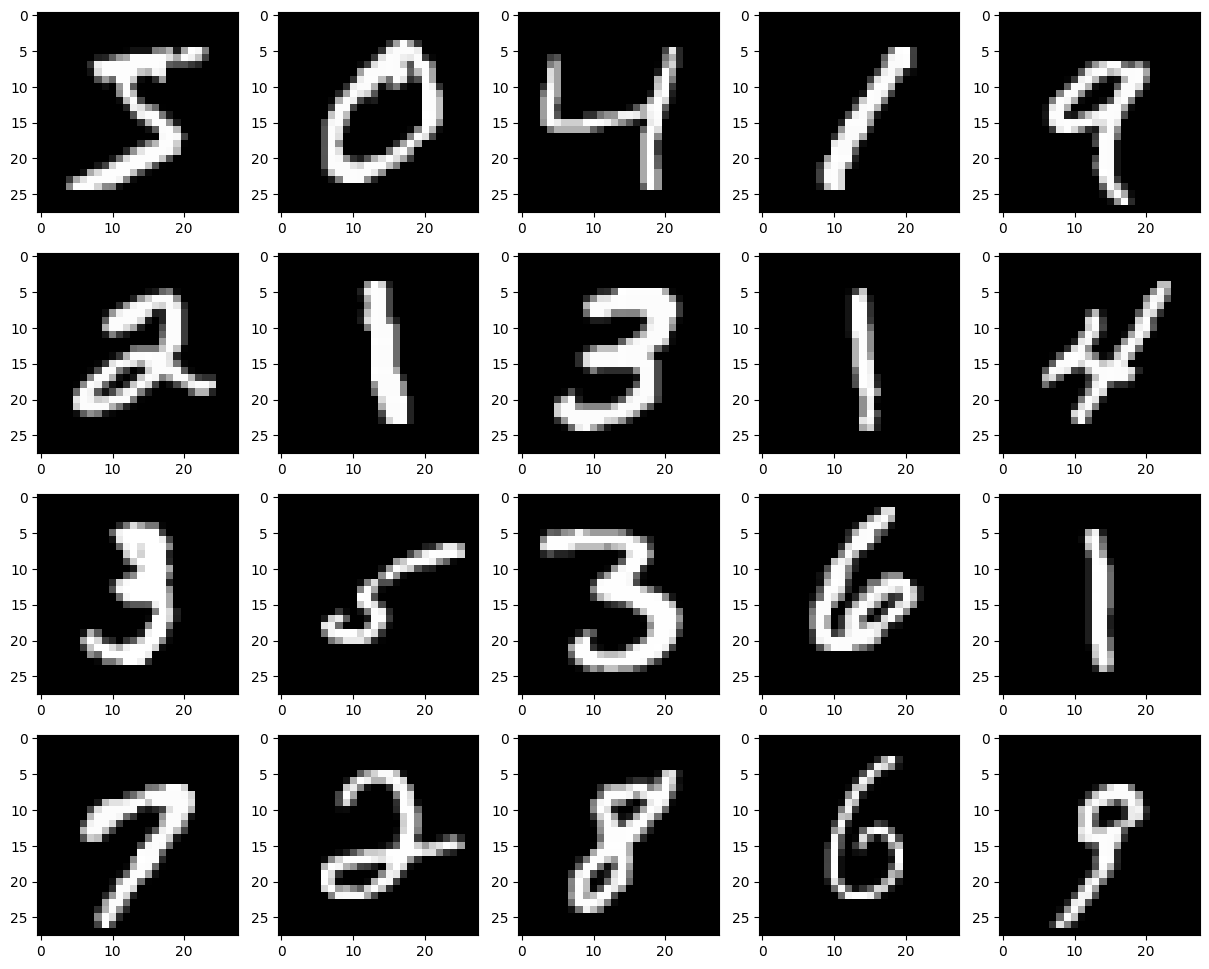

In [69]:
# Handwriting image samples in training set
plt.figure(figsize = (15, 12))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(x_train[i], cmap = "gray")
plt.show()

In [81]:
# Creating NN Model architecture
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (x_train.shape[1], x_train.shape[2])),
    keras.layers.Dense(280, activation = "relu"),
    keras.layers.Dense(280, activation = tf.keras.layers.LeakyReLU(alpha = 0.001)),
    keras.layers.Dense(10),
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 280)               219800    
                                                                 
 dense_10 (Dense)            (None, 280)               78680     
                                                                 
 dense_11 (Dense)            (None, 10)                2810      
                                                                 
Total params: 301,290
Trainable params: 301,290
Non-trainable params: 0
_________________________________________________________________


In [82]:
# Defining loss type and optimizer type for our model
model_loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True)
model_optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model_metrics = ["accuracy"]
model.compile(loss = model_loss, optimizer = model_optimizer, metrics = model_metrics)

In [83]:
# Training Hyperparameter choosing
batch_size = 32
epochs = 100

In [84]:
# Train the model and store in the history
history = model.fit(x_train, y_train, batch_size=batch_size, epochs = epochs, shuffle = True, verbose = 2, validation_data = (x_test, y_test))

# Extracting the accuracy values from the training history
train_accuracy = history.history["accuracy"]
test_accuracy = history.history["val_accuracy"]
# Extracting the loss values from the training history
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]

Epoch 1/100
1875/1875 - 7s - loss: 0.4128 - accuracy: 0.8917 - val_loss: 0.2001 - val_accuracy: 0.9433 - 7s/epoch - 4ms/step
Epoch 2/100
1875/1875 - 6s - loss: 0.1745 - accuracy: 0.9495 - val_loss: 0.1521 - val_accuracy: 0.9548 - 6s/epoch - 3ms/step
Epoch 3/100
1875/1875 - 7s - loss: 0.1283 - accuracy: 0.9628 - val_loss: 0.1193 - val_accuracy: 0.9632 - 7s/epoch - 4ms/step
Epoch 4/100
1875/1875 - 7s - loss: 0.1007 - accuracy: 0.9713 - val_loss: 0.1051 - val_accuracy: 0.9686 - 7s/epoch - 4ms/step
Epoch 5/100
1875/1875 - 7s - loss: 0.0812 - accuracy: 0.9759 - val_loss: 0.0903 - val_accuracy: 0.9726 - 7s/epoch - 3ms/step
Epoch 6/100
1875/1875 - 7s - loss: 0.0671 - accuracy: 0.9806 - val_loss: 0.0820 - val_accuracy: 0.9758 - 7s/epoch - 4ms/step
Epoch 7/100
1875/1875 - 6s - loss: 0.0563 - accuracy: 0.9839 - val_loss: 0.0750 - val_accuracy: 0.9777 - 6s/epoch - 3ms/step
Epoch 8/100
1875/1875 - 7s - loss: 0.0475 - accuracy: 0.9867 - val_loss: 0.0788 - val_accuracy: 0.9752 - 7s/epoch - 3ms/step


In [85]:
# Creating the accuracy per epoch figure
fig = go.Figure()
# Training and testing accuracy lines per epoch
fig.add_trace(go.Scatter(x = list(range(1, epochs+1)), y = train_accuracy, mode = "lines", name = "Training Accuracy"))
fig.add_trace(go.Scatter(x = list(range(1, epochs+1)), y = test_accuracy, mode = "lines", name = "Test Accuracy"))
# Updating layout
fig.update_layout(title = "Training and Test Accuracy", xaxis_title = "Epoch", yaxis_title = "Accuracy")
fig.show()

In [86]:
# Creating the loss per epoch figure
fig = go.Figure()
# Training and testing loss lines per epoch
fig.add_trace(go.Scatter(x = list(range(1, epochs+1)), y = train_loss, mode = "lines", name = "Training Loss"))
fig.add_trace(go.Scatter(x = list(range(1, epochs+1)), y = test_loss, mode = "lines", name = "Test Loss"))
# Update layout
fig.update_layout(title = "Training and Test Loss", xaxis_title = "Epoch", yaxis_title = "Loss")
fig.show()

313/313 [==============================] - 1s 3ms/step


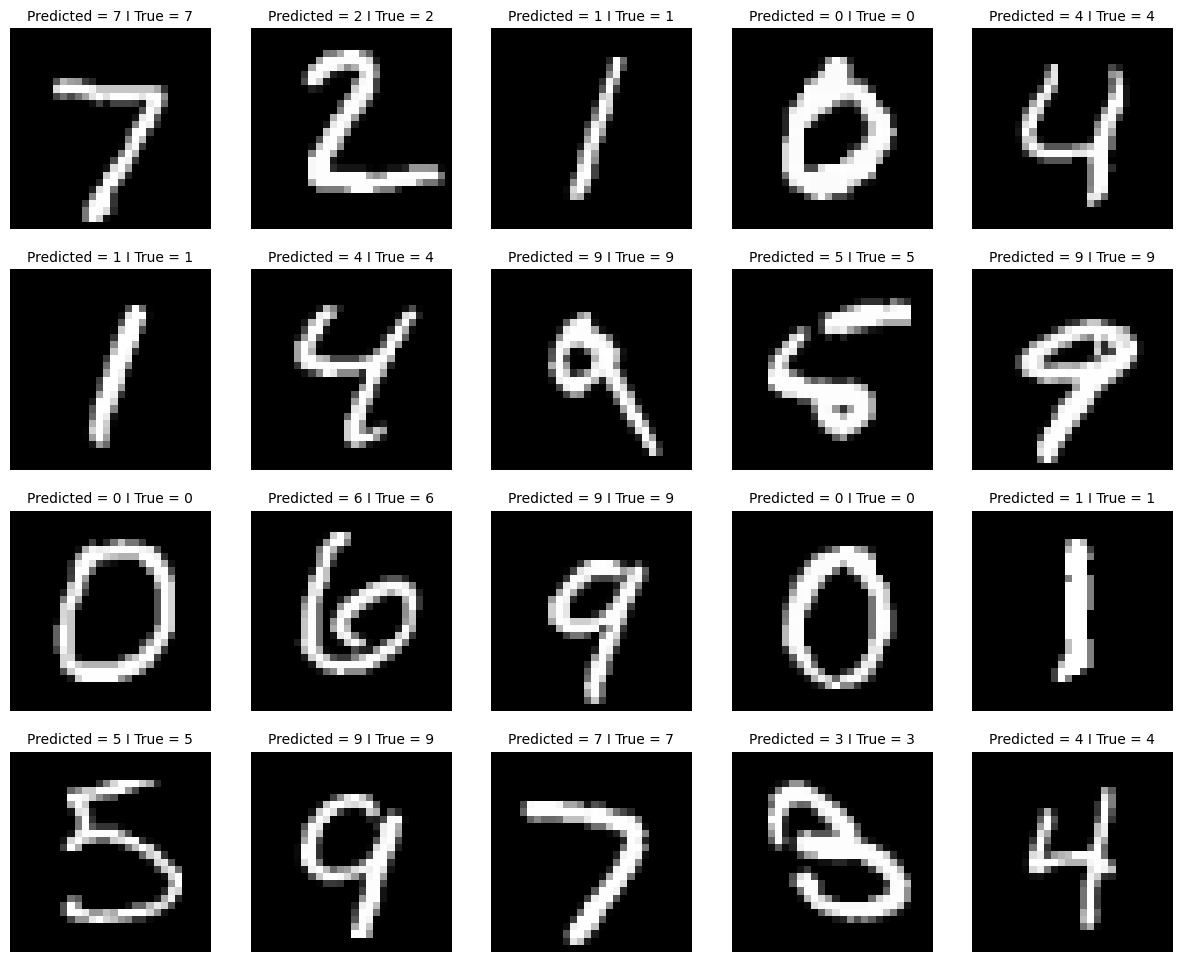

In [90]:
# 20 testing data sample and their predicted values
y_pred = model.predict(x_test)

plt.figure(figsize = (15, 12))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(x_test[i], cmap = "gray")
    plt.axis("off")
    plt.title("Predicted = {0} I True = {1}".format(y_pred[i].argmax(), y_test[i]), fontsize = 10)
plt.show()

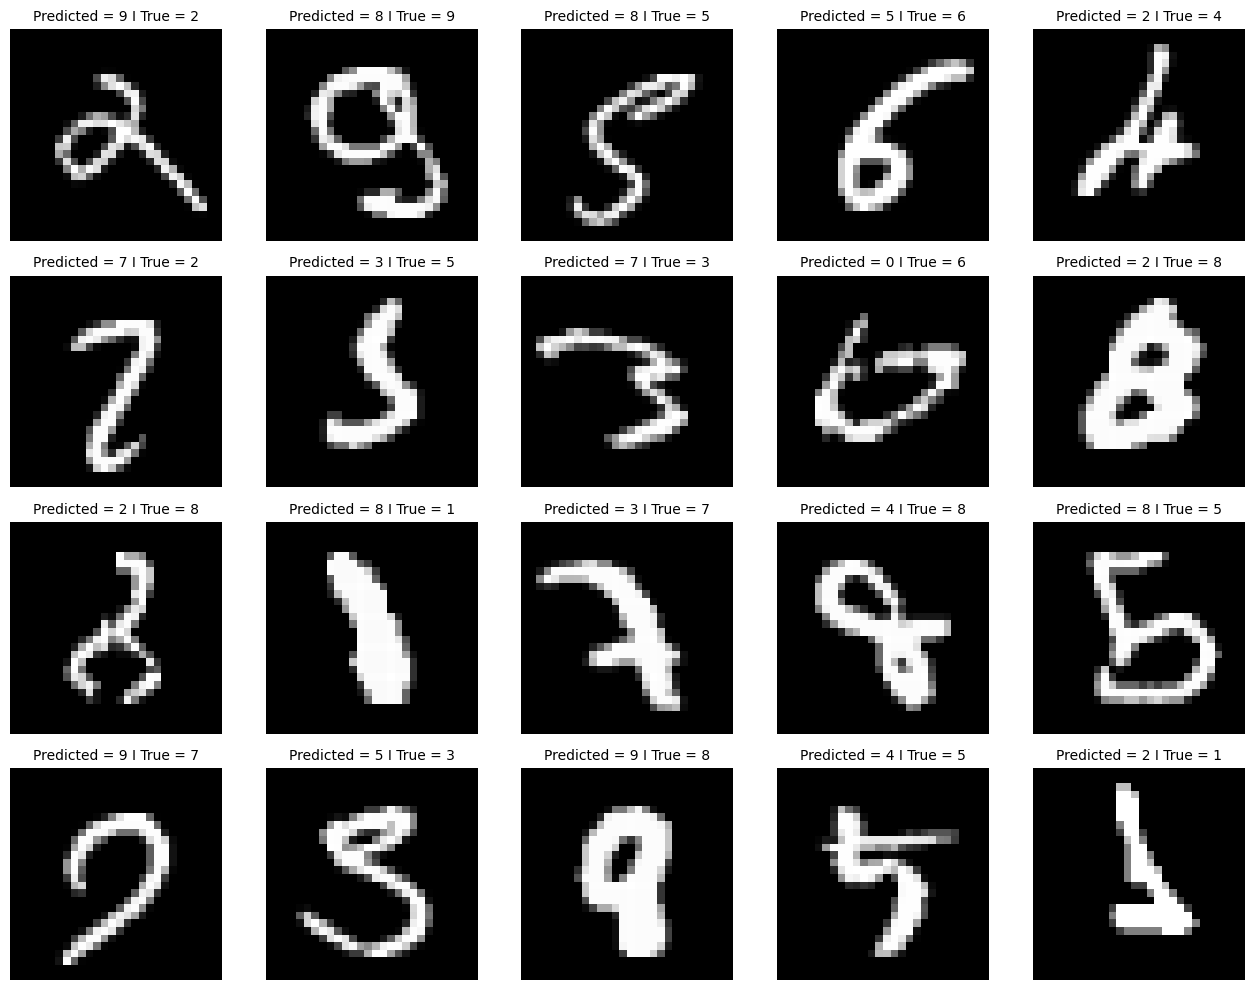

In [89]:
# 20 testing data sample and their non-correct predicted values
sum = 0
fig = plt.figure(figsize = (13, 10))

for i in range(10000):
    if sum == 20:
        break
    if y_pred[i].argmax() != y_test[i]:
        ax = fig.add_subplot(4, 5, sum+1)
        ax.imshow(x_test[i], cmap="gray")
        ax.axis("off")
        ax.set_title("Predicted = {0} I True = {1}".format(y_pred[i].argmax(), y_test[i]), fontsize=10)
        sum += 1

plt.tight_layout()
plt.show()